RNN
https://www.youtube.com/watch?v=WEV61GmmPrk

Hiddens states -------

Recurrent Neural Networks (RNNs) use hidden states to retain information from previous time steps, allowing them to use past outputs as inputs to process sequential data. In an RNN, each time step processes the current input and combines it with information from a hidden state that was generated at the previous time step. This hidden state serves as a memory, enabling the network to retain context and dependencies over time.

Here's how it works:

1. **Input and Hidden State Combination**: At each time step \( t \), the RNN receives the current input \( x_t \) and the hidden state from the previous time step \( h_{t-1} \).
2. **Updating the Hidden State**: The RNN updates its hidden state \( h_t \) based on both \( x_t \) and \( h_{t-1} \), typically using a function like:
   \[
   h_t = f(W \cdot x_t + U \cdot h_{t-1} + b)
   \]
   where \( W \) and \( U \) are weights, \( b \) is a bias term, and \( f \) is an activation function (e.g., tanh or ReLU).
3. **Output**: The updated hidden state \( h_t \) is used as the input for the next time step and can also be used to produce an output \( y_t \) if needed. 

This process allows RNNs to capture temporal dependencies in the data, as each hidden state effectively "remembers" information from previous steps, enabling the network to use this memory when predicting future outputs.

https://ai.plainenglish.io/rnn-mathematical-intuition-11f33de62eca

### Name Classification Using A Recurrent Neural Net

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from utills import ALL_LETTERS, N_LETTERS
from utills import load_data, line_to_tensor, letter_to_tensor, random_training_example

In [2]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size+hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size+hidden_size, output_size)

        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_tensor, hidden_tensor):
        combined = torch.cat((input_tensor, hidden_tensor), 1)

        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)

        return output, hidden
    
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

In [4]:
category_lines, all_categories = load_data()
n_categories = len(all_categories)
print(n_categories)

18


In [5]:

n_hidden = 128
rnn = RNN(N_LETTERS, n_hidden, n_categories)

# one step
input_tensor = letter_to_tensor('A')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor, hidden_tensor)

In [6]:
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [ ]:
#print(output.size())
#print(next_hidden.size())

# whole sequence/name
input_tensor = line_to_tensor('Albert')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor[0], hidden_tensor)
#print(output.size())
#print(next_hidden.size())

In [7]:
#
def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

In [8]:
print(category_from_output(output))

Irish


In [9]:
criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

In [11]:
def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return output, loss.item()


5000 5.0 2.3714 Soucek / Czech CORRECT
10000 10.0 1.8346 Colman / Arabic WRONG (Irish)
15000 15.0 2.5601 Eyres / Dutch WRONG (English)
20000 20.0 0.8007 Malouf / Arabic CORRECT
25000 25.0 3.5253 Hay / Chinese WRONG (Scottish)
30000 30.0 1.4992 Gallo / Italian WRONG (Spanish)
35000 35.0 2.4072 Rousses / Dutch WRONG (Greek)
40000 40.0 4.0254 Conchobhar / German WRONG (Irish)
45000 45.0 2.1887 Whiting / Japanese WRONG (English)
50000 50.0 1.6836 Zawisza / Czech WRONG (Polish)
55000 55.00000000000001 1.4481 Hruska / Polish WRONG (Czech)
60000 60.0 1.0027 Hama / Japanese CORRECT
65000 65.0 1.0495 Zou / Korean WRONG (Chinese)
70000 70.0 0.1259 Hanabusa / Japanese CORRECT
75000 75.0 1.5965 Alduino / Portuguese WRONG (Italian)
80000 80.0 0.3614 Alberighi / Italian CORRECT
85000 85.0 2.3674 Toman / Arabic WRONG (Czech)
90000 90.0 4.6397 Loza / Portuguese WRONG (Russian)
95000 95.0 1.3991 Crespo / Portuguese CORRECT
100000 100.0 3.0329 Bradach / Czech WRONG (Irish)


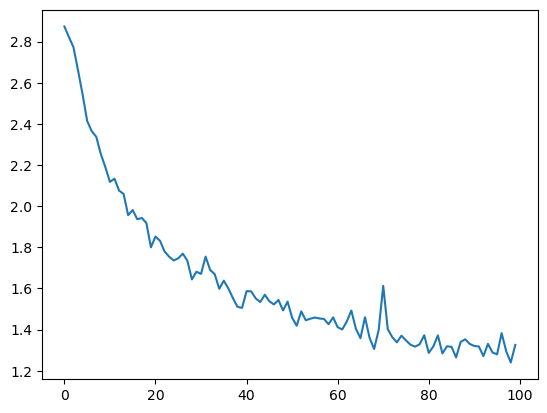

In [12]:
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    
    output, loss = train(line_tensor, category_tensor)
    current_loss += loss 
    
    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
        
    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f} {line} / {guess} {correct}")
        
    
plt.figure()
plt.plot(all_losses)
plt.show()

In [13]:
def predict(input_line):
    print(f"\n> {input_line}")
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)
        
        hidden = rnn.init_hidden()
    
        for i in range(line_tensor.size()[0]):
            output, hidden = rnn(line_tensor[i], hidden)
        
        guess = category_from_output(output)
        print(guess)
    

In [ ]:
while True:
    sentence = input("Input:")
    if sentence == "quit":
        break
    
    predict(sentence)